In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import sys
ROOT_DIR = "../"
sys.path.append(ROOT_DIR)
from utils.citymeta import load_all
ROOT = r"D:\Dropbox (Personal)\Personal Work\_Projects2023\01_city-never-was"
# ROOT = "/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023"
EXPORT_FOLDER = f"{ROOT}/01_city-never-was/_data/_curated/c_analysis"
TABLE_FOLDER = f"{ROOT}/01_city-never-was/_table"
if not os.path.exists(TABLE_FOLDER):
    os.makedirs(TABLE_FOLDER)


In [2]:
N = 8
city_path = os.path.join(EXPORT_FOLDER,
                            f"c_city_full_cluster={N}.csv")
citydf = pd.read_csv(city_path)

In [ ]:
variables = ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3',
       'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 
       'diversity', 'total_flux', 'gdp_per_cap_country_2022','num_person_killed_per_lakh_city',
       'road_injury_cap',
       'waze_accident_count',
       'sidewalk_presence', 
       # 'exposure_presence',
       'obj_bicycle', 'obj_motorcycle', 'obj_person', 'obj_truck', 'obj_car',
       'obj_bus'
       ]

In [10]:
cluster_name = {
0:"scenery open space",
2:"walkable residential community",
7:"vegetated open space with lawn",
6:"water-body open space",
3:"low-rise diverse street",
4:"high-way or traffic connector",
1:"multi-modal traffic urban center",
5:"car-oriented urban center",
} # need to find some example images to check the results
rename = {
    "diversity":"Visual cluster diversity",
    "total_flux":"Total CO2 flux",
    "num_person_killed_per_lakh_city":"Road fatalities per 100,000 people",
    "gdp_per_cap_country_2022":"GDP per capita",
    "road_injury_cap":"Road injuries per capita (WHO)",
    "waze_accident_count":"Waze Accident Reported",
    "sidewalk_presence":"Average Sidewalk Index",
    "exposure_presence":"Average Exposure Sign",
    "obj_motorcycle":'# Motorcycle Observed',
    'obj_bicycle': "# Bicycle Observed",
    'obj_motorcycle':"# Motorcycle Observed",
    'obj_person':"# Person Observed", 
    'obj_truck':"# Truck Observed",
    'obj_car':"# Car Observed",
       'obj_bus':"# Bus Observed"
    
}

In [11]:
param = ['mean', 'std', 'min', 'max','count']
summary = citydf[variables].describe().T[param]
summary.index = [cluster_name[int(i.split('_')[-1])] if 'cluster' in i else rename[i] for i in summary.index]
# round up to 3 digit
summary = summary.round(3)
summary

,mean,std,min,max,count
scenery open space,0.114,0.155,0.000,0.673,118.0
multi-modal traffic urban center,0.108,0.156,0.000,0.676,118.0
walkable residential community,0.140,0.169,0.000,0.651,118.0
low-rise diverse street,0.115,0.206,0.000,0.829,118.0
high-way or traffic connector,0.138,0.101,0.000,0.463,118.0
car-oriented urban center,0.149,0.159,0.000,0.592,118.0
water-body open space,0.112,0.187,0.004,0.958,118.0
vegetated open space with lawn,0.124,0.172,0.000,0.789,118.0
Visual cluster diversity,0.673,0.152,0.113,0.965,118.0
Total CO2 flux,52.312,60.564,1.010,310.699,118.0


In [12]:
summary.to_csv(TABLE_FOLDER+"/city_summary.csv")

<AxesSubplot:xlabel='sidewalk_presence', ylabel='country_clean'>

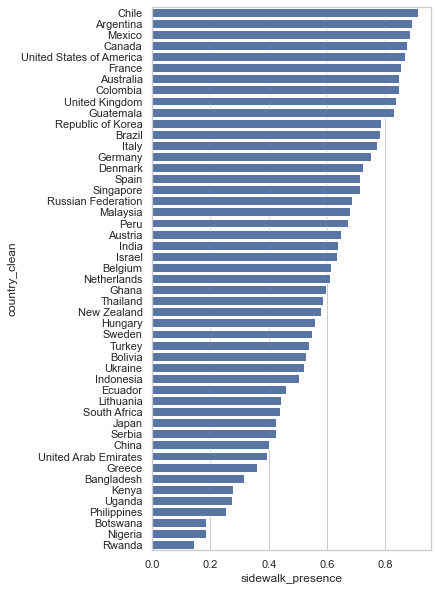

In [17]:
# check the ranking of observed motorcyle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(
    data = citydf.drop_duplicates("country_clean").sort_values('sidewalk_presence', ascending = False),
    y = "country_clean",
    x = 'sidewalk_presence'
)